### 군집(clustering)
* 레이블이 없는 데이터에 레이블을 부여하고자 할때 사용
* 비지도 학습으로 유사한 정도에 따라 다수의 객체를 그룹으로 만들때 사용
* 군집을 통해 레이블을 선정하여 지도학습으로 변경
* 군집의 개수 지정하는 방법
    - 감으로(해당 그룹의 개수를 미리 알고 있는 경우)
    - 평가지표로 확인(실루엣 지표 적용( -1 ~ 1사이, 1에 가까울수록 좋다)
    - 그래프 그려서 눈으로 확인

#### k-means
* k-means은 군집화(clustering)에서 가장 일반적으로 사용되는 알고리즘
* 거리기반 군집화다. 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

#### k-means 파라미터
* n_clusters : 가장 중요한 파라미터로 군집화할 개수를 정의한다.
* init : 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 일반적으로 k-means++방식으로 최초 설정한다
    - k-means++ : 군집하기위한 중심좌표를 찍는 방식이며, 데이터 중 하나를 무작위로 선정후 다음번에는 가장 먼 곳을 중심으로 잡고 진행하는 방식
* max_iter : 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.

#### 군집화가 완료되면 관련 주요 속성이 있다
* labels_ : 정답을 가지고 있는 변수(군집의 번호)
* cluster_centers_ : 각 군집 중심점 좌표(shape는[군집 개수, 피처 개수]), 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 할 수 있다.

### 고객분류
* 고객들의 정보들을 가지고 있는 데이터 셋이다. 해당 데이터 셋을 이용하여 사용금액에 따른 고객을 분류하고자 한다.
* 분류 대상 : 연간 소득 대비 지출 점수를 통한 분류
* 컬럼
    - CustomerID : 고객 아이디
    - Gender : 성별
    - Age : 나이
    - Annual Income (k$) : 연간소득
    - Spending Score (1-100) : 지출 점수

* 참고 - 필요한 컬럼은 연간 소득과 지출 점수만 있으면 된다.

In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data_set/7.군집/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
!pip install yellowbrick
 # 시각화 해주는 기능, 라이브러리 다운받기

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---------------------------------- ----- 245.8/282.6 kB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 3.5 MB/s eta 0:00:00


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

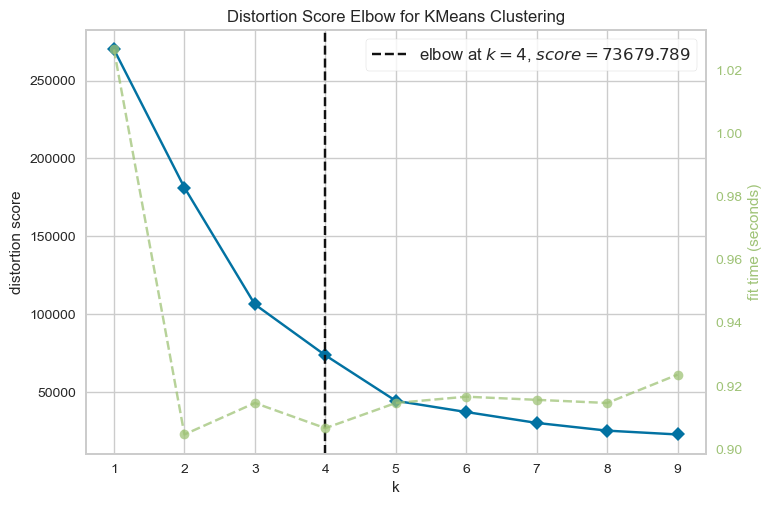

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from yellowbrick.cluster import KElbowVisualizer

features = ['Annual Income (k$)', 'Spending Score (1-100)']
model = KMeans()
vis = KElbowVisualizer(model, k=(1, 10))
vis.fit(df[features])
vis.show()
# 4개의 집단으로 나눈 것이 가장 좋다. 

In [8]:
from sklearn.metrics import silhouette_score
all_scores = []
i = 2
while i<10:
    i+=1
    km = KMeans(n_clusters=i)
    km.fit(df[features])
    sil_score = silhouette_score(df[features], km.labels_)
    dic = {"cluster_num":i, "score":sil_score}
    all_scores.append(dic)
s_df = pd.DataFrame(all_scores)

In [10]:
s_df.sort_values(by="score")
# sil 집단으로 군집 형성 시 5개의 집단으로 만드는 것이 점수가 가장 높다. 
# 보통 0.5 이상이면 좋은 점수

,cluster_num,score
7,10,0.447610
4,7,0.453188
5,8,0.454928
6,9,0.460504
0,3,0.467614
1,4,0.493196
3,6,0.539761
2,5,0.553932


In [12]:
set(km.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [14]:
km = KMeans(n_clusters=5, init="k-means++", max_iter=300)
km.fit(df[features])

KMeans(n_clusters=5)

In [15]:
set(km.labels_)

{0, 1, 2, 3, 4}

In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df['cluster'] = km.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

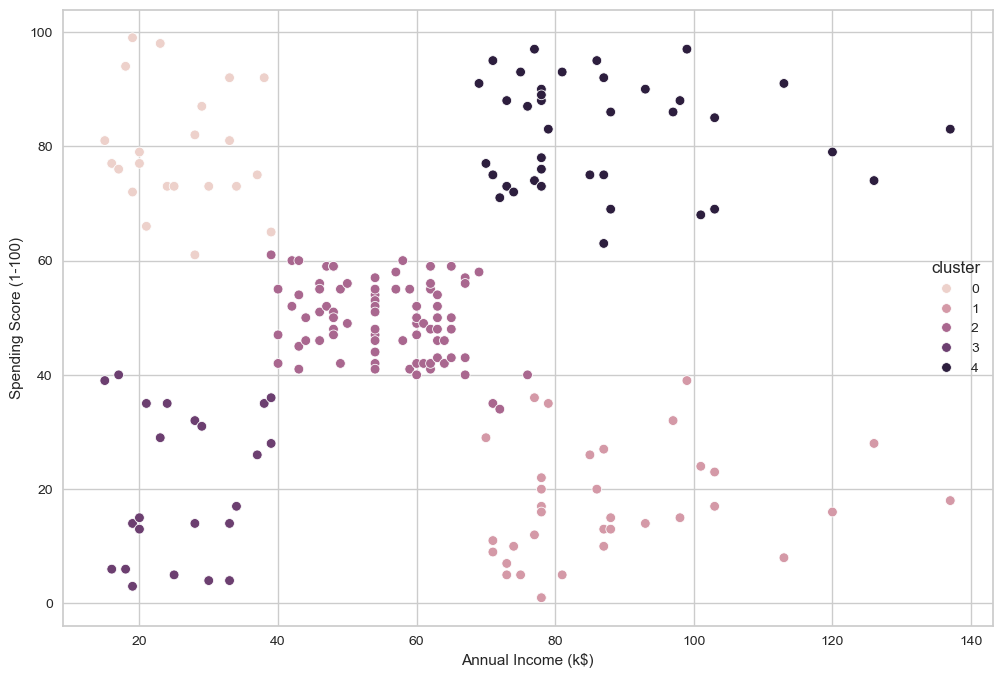

In [20]:
f = ['Annual Income (k$)', 'Spending Score (1-100)', 'cluster']
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df[f], x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster')

In [22]:
km.cluster_centers_
# 각 군집의 중심좌표를 알려주는 기능

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513]])

In [23]:
cnt = km.cluster_centers_
cnt[:,0]

array([25.72727273, 88.2       , 55.2962963 , 26.30434783, 86.53846154])

In [24]:
cnt[:,1]

array([79.36363636, 17.11428571, 49.51851852, 20.91304348, 82.12820513])

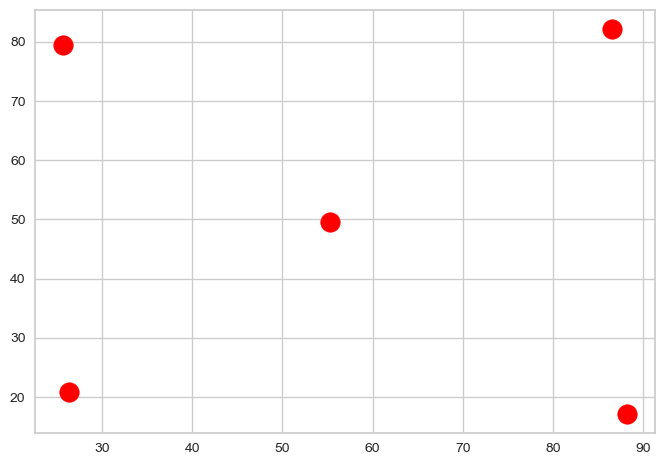

In [25]:
plt.scatter(x=cnt[:,0], y=cnt[:,1], c="red", s=200)

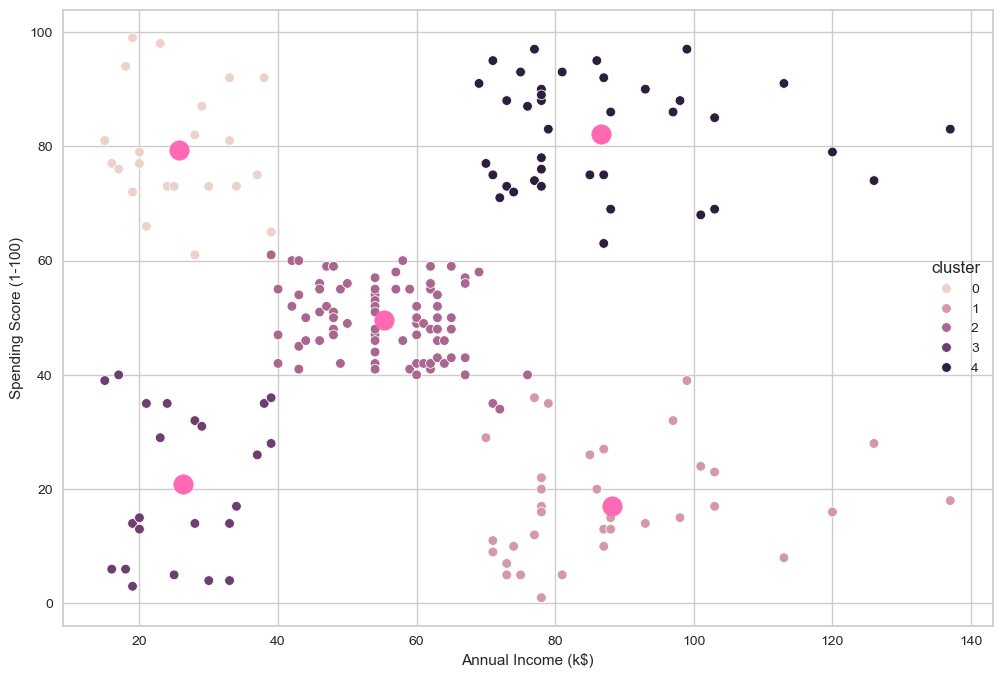

In [39]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df[f], x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster')

plt.scatter(x=cnt[:,0], y=cnt[:,1], c="hotpink", s=200)

In [40]:
fe = ['Annual Income (k$)', 'Spending Score (1-100)']
label = "cluster"

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[fe], df[label], test_size=0.3)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
params = {
    "n_estimators" : range(5, 100, 10), 
    "max_depth" : range(4, 11, 2), 
    "min_samples_leaf" : range(5, 21, 5)
}

In [43]:
rfc = RandomForestClassifier()
grid_cv = GridSearchCV(rfc, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print("최적의 파라미터 : ", grid_cv.best_params_)
print("train : ", grid_cv.score(X_train, y_train))
print("test  : ", grid_cv.score(X_test, y_test))

최적의 파라미터 :  {'max_depth': 6, 'min_samples_leaf': 10, 'n_estimators': 5}
train :  0.9785714285714285
test  :  0.95


In [45]:
grid_cv.predict([[20, 20]])

array([3])